In [ ]:
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# Step 1: Load the text of the short story
import requests

# Fetch the content of the file from the URL
response = requests.get('https://www.gutenberg.org/cache/epub/1952/pg1952.txt')
text = response.text


In [ ]:
# Step 2: Preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

processed_text = preprocess_text(text)

In [ ]:
# Step 3: Create a dictionary of all the words
from collections import Counter


# Split the text into words
word_list = processed_text.split()

# Count the occurrences of each word
word_counts = Counter(word_list)

# Create a dictionary for unique words only
word_to_idx = {word: idx for idx, word in enumerate(word_counts.keys())}

# Print the dictionary size (number of unique words)
print("Dictionary size (number of unique words):", len(word_to_idx))


Dictionary size (number of unique words): 1759


In [ ]:
import requests
import re
import numpy as np
from collections import Counter

def generate_cbow_vectors_optimized(text, window_size=2, vector_dim=100, batch_size=1000):
    word_list = text.split()
    word_counts = Counter(word_list)
    sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)
    word_to_idx = {word: idx for idx, word in enumerate(sorted_words)}

    cbow_vectors = []
    batch_start = 0
    while batch_start < len(word_list):
        batch_end = min(batch_start + batch_size, len(word_list))
        batch = word_list[batch_start:batch_end]

        for i in range(window_size, len(batch) - window_size):
            context = batch[i - window_size:i] + batch[i + 1:i + window_size + 1]
            target = batch[i]
            context_idxs = [word_to_idx[word] for word in context]
            target_idx = word_to_idx[target]
            context_vector = np.mean(np.eye(len(word_to_idx))[context_idxs], axis=0)
            cbow_vectors.append((context_vector, target_idx))


        batch_start += batch_size

    return cbow_vectors, word_to_idx

# Generate CBOW vectors
cbow_vectors, word_to_idx = generate_cbow_vectors_optimized(processed_text)

# Now you can use cbow_vectors and word_to_idx as needed


In [ ]:
print(word_to_idx)

{'the': 0, 'and': 1, 'i': 2, 'of': 3, 'to': 4, 'a': 5, 'it': 6, 'is': 7, 'in': 8, 'that': 9, 'you': 10, 'or': 11, 'project': 12, 'gutenberg': 13, 'for': 14, 'with': 15, 'this': 16, 'but': 17, 'not': 18, 'so': 19, 'me': 20, 'as': 21, 'he': 22, 'all': 23, 'are': 24, 'if': 25, 'by': 26, 'work': 27, 'at': 28, 'be': 29, 'any': 30, 'john': 31, 'there': 32, 'have': 33, 'on': 34, 'my': 35, 'was': 36, 'can': 37, 'do': 38, 'she': 39, 'about': 40, 'one': 41, 'works': 42, 'out': 43, 'dont': 44, 'said': 45, 'would': 46, 'down': 47, 'see': 48, 'we': 49, 'electronic': 50, 'when': 51, 'no': 52, 'get': 53, 'other': 54, 'am': 55, 'had': 56, 'from': 57, 'terms': 58, 'very': 59, 'paper': 60, 'room': 61, 'her': 62, 'foundation': 63, 'e': 64, 'will': 65, 'like': 66, 'now': 67, 'pattern': 68, 'states': 69, 'little': 70, 'such': 71, 'must': 72, 'just': 73, 'copyright': 74, 'may': 75, 'him': 76, 'agreement': 77, 'license': 78, 'much': 79, 'what': 80, 'here': 81, 'up': 82, 'wallpaper': 83, 'good': 84, 'full': 8

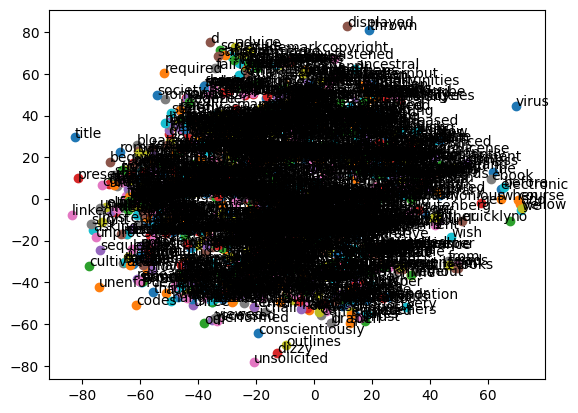

In [ ]:
def find_nearest_words(word_embeddings, word_to_idx, target_word, num_neighbors=5):
    target_idx = word_to_idx.get(target_word)
    if target_idx is None:
        print("Word not found in vocabulary.")
        return

    word_vectors = np.array([vec for vec, _ in word_embeddings])
    target_vector = word_vectors[target_idx]
    distances = np.linalg.norm(word_vectors - target_vector, axis=1)
    nearest_indices = np.argsort(distances)[1:num_neighbors+1]

    nearest_words = []
    for idx in nearest_indices:
        word = list(word_to_idx.keys())[list(word_to_idx.values()).index(idx)]
        nearest_words.append(word)
        print(f"{word}: {distances[idx]}")

    return nearest_words


In [ ]:
selected_word = "the"
nearest_words = find_nearest_words(cbow_vectors, word_to_idx, selected_word)
print(f"The nearest words to '{selected_word}' are: {nearest_words}")


ValueError: 6406 is not in list

In [ ]:
# Step 5: Visualize word embeddings
def visualize_word_embeddings(word_embeddings, word_to_idx):
    tsne = TSNE(n_components=2, random_state=42)
    word_vectors = np.array([vec for vec, _ in word_embeddings])
    embedded = tsne.fit_transform(word_vectors)
    for word, idx in word_to_idx.items():
        plt.scatter(embedded[idx, 0], embedded[idx, 1])
        plt.annotate(word, (embedded[idx, 0], embedded[idx, 1]))
    plt.show()

visualize_word_embeddings(cbow_vectors, word_to_idx)

In [ ]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gensim
from sklearn.manifold import TSNE
import requests
import nltk.data

nltk.download('punkt')

response = requests.get('https://www.gutenberg.org/cache/epub/1952/pg1952.txt')
text = response.text

corpus_raw = text
print("Corpus is now {0} characters long".format(len(corpus_raw)))

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
raw_sentences = tokenizer.tokenize(corpus_raw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Corpus is now 51968 characters long


In [ ]:
def sentence_to_wordlist(raw):
    '''Remove all characters except letters and convert to lowercase '''
    clean = re.sub("[^a-zA-Z]"," ", raw).lower()
    words = clean.split()
    return words

def remove_stopwords(sentence, stopwords):
    '''Remove stopwords from a sentence'''
    return [word for word in sentence if word not in stopwords]

stopwords = { "jennie", "had", "including", "behind", "t", "f", "is", "that", "something", "and", "the", "always", "etc", "will", "still", "about", "it", "where", "when", "up", "in", "make", "not", "gutenberg", "use", "not", "have", "free"}  # Add your stopwords here


In [ ]:
sentences = []

for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        words = sentence_to_wordlist(raw_sentence)
        words = remove_stopwords(words, stopwords)
        sentences.append(words)

In [ ]:
print(sentences[5])

['i', 'proudly', 'declare', 'there', 'queer']


In [ ]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 7,387 tokens


In [ ]:
unique_words = set(word for sentence in sentences for word in sentence)
# Optionally convert the set to a dictionary with word indices
word_dict = {word: idx for idx, word in enumerate(unique_words)}

In [ ]:
# Print the dictionary size
print("Dictionary of Unique Words Size:", len(word_dict))

Dictionary of Unique Words Size: 1682


In [ ]:
num_features = 200
min_word_count = 5
context_size = 10
downsampling = 1e-4
seed = 2

In [ ]:
books2vec = w2v.Word2Vec(
    sg=0, #cbow
    seed=seed,
    vector_size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [ ]:
books2vec.build_vocab(sentences)
print("books2vec vocabulary length:", len(books2vec.wv.key_to_index))

books2vec vocabulary length: 283


In [ ]:
books2vec.train(sentences, total_examples=books2vec.corpus_count, epochs=books2vec.epochs)

(4503, 36935)

In [ ]:
words = list(books2vec.wv.index_to_key)
word_vectors = np.array([books2vec.wv[word] for word in words])

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
word_vectors_reduced = tsne.fit_transform(word_vectors)

In [ ]:
points = pd.DataFrame(
    [(word, coords[0], coords[1])
        for word, coords in [
            (word, word_vectors_reduced[books2vec.wv.key_to_index[word]])
            for word in books2vec.wv.key_to_index
        ]],
    columns=["word", "x", "y"])

In [ ]:
points[100:105]

,word,x,y
100,archive,-0.615519,-8.082971
101,than,0.438644,-12.597184
102,long,2.569976,-3.675264
103,night,7.536355,-6.735271
104,literary,6.171442,1.950133


<Axes: xlabel='x', ylabel='y'>

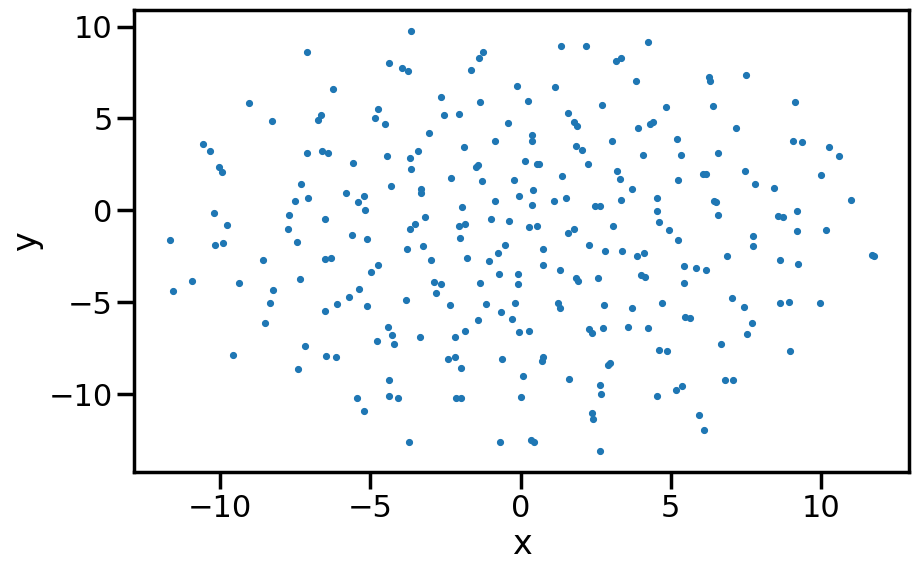

In [ ]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(10, 6))

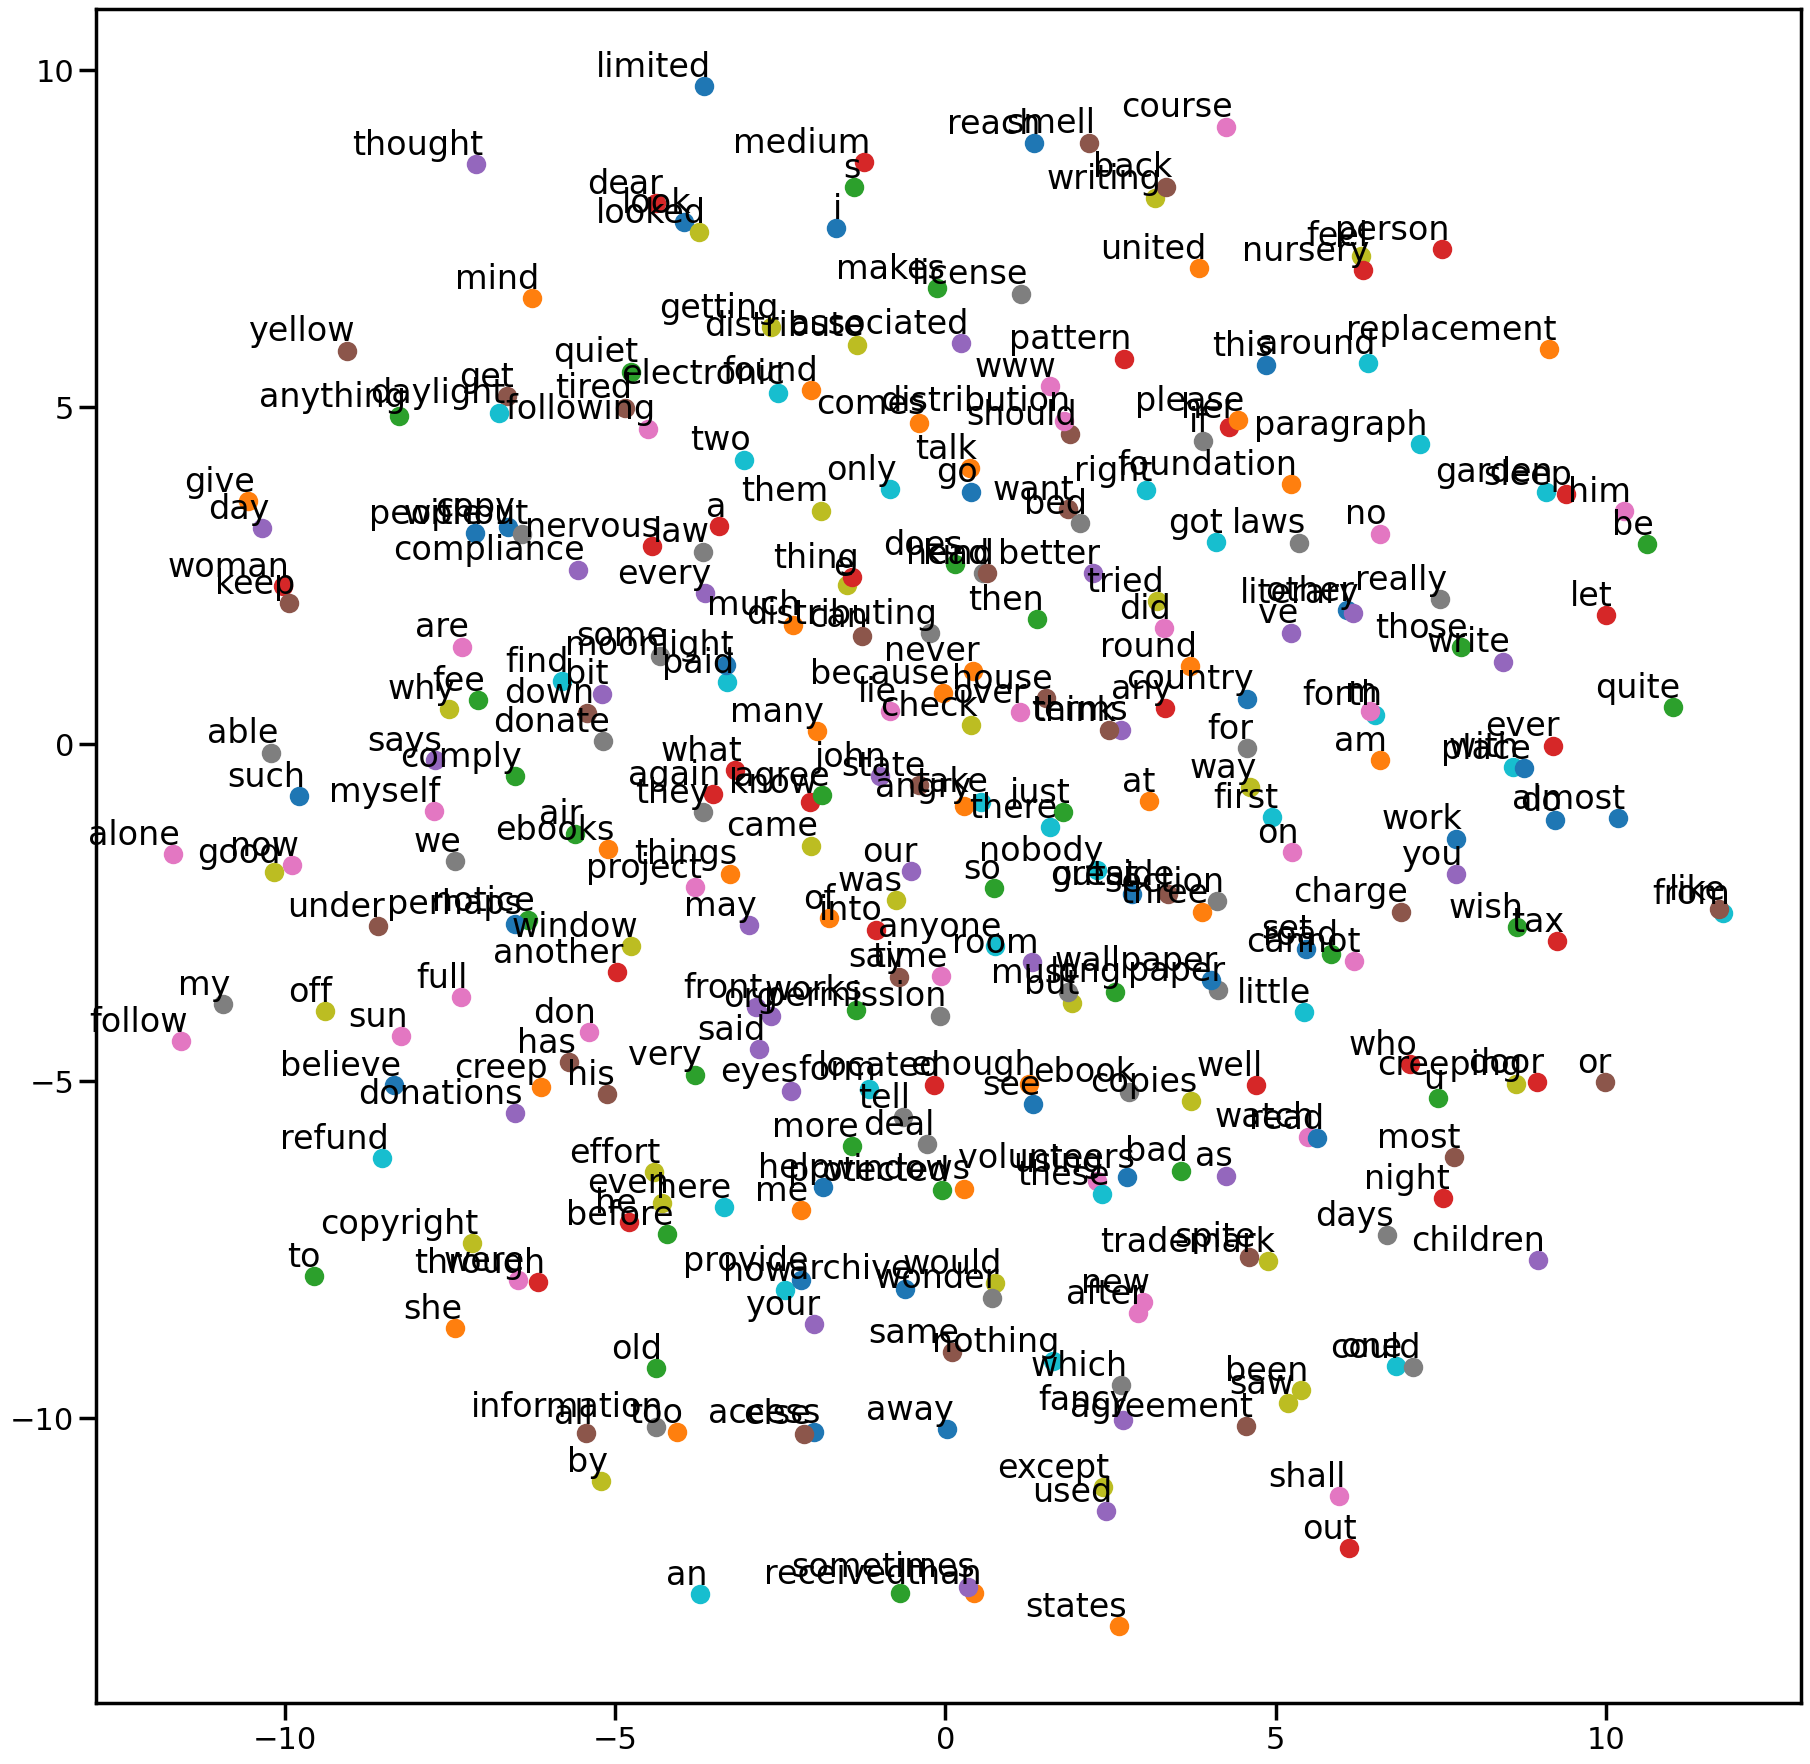

In [ ]:
plt.figure(figsize=(22, 22))
for i, label in enumerate(words):
    x, y = word_vectors_reduced[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [ ]:
example_words = ['windows', 'children', 'night', 'paid', 'license', 'foundation']

# Finding and printing the nearest words
for word in example_words:
    if word in books2vec.wv:
        nearest_words = books2vec.wv.most_similar(word)
        print(f"Words similar to '{word}': {nearest_words}")
    else:
        print(f"'{word}' not in vocabulary")

Words similar to 'windows': [('protected', 0.18031297624111176), ('access', 0.1656942218542099), ('follow', 0.15924696624279022), ('deal', 0.1543962061405182), ('kind', 0.13827931880950928), ('talk', 0.12856900691986084), ('works', 0.1284535676240921), ('sleep', 0.12740302085876465), ('long', 0.12567205727100372), ('by', 0.11203791946172714)]
Words similar to 'children': [('a', 0.18585315346717834), ('as', 0.18210835754871368), ('charge', 0.17315615713596344), ('days', 0.16105759143829346), ('comes', 0.13558924198150635), ('only', 0.13172252476215363), ('no', 0.1274021714925766), ('road', 0.1260594129562378), ('section', 0.12289412319660187), ('even', 0.12172994762659073)]
Words similar to 'night': [('most', 0.2150789201259613), ('why', 0.19618090987205505), ('days', 0.17231570184230804), ('paid', 0.16150017082691193), ('here', 0.16128605604171753), ('how', 0.15974757075309753), ('my', 0.15854112803936005), ('down', 0.14247536659240723), ('got', 0.14037175476551056), ('think', 0.138478